<a href="https://colab.research.google.com/github/hydrationn/AI-based-Representation-and-Problem-Solving/blob/main/20240327_4%EC%A3%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_2_%5BHands_On%5D_Text_to_Numeric_Representation_using_Pretrained_Language_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Hands-On] Text to Numeric Representation using Pretrained Language Model

- Author : Sangkeun Jung (hugmanskj@gmail.com)

> Educational Purpose



## Description

The recent significant success in artificial intelligence can be attributed to the ability to convert any type of data (text, image, voice, etc.) into a **numeric representation** that encapsulates sufficient information. This practice session is the **second in a series of two exercises** designed to introduce and provide *hands-on experience* with the 'Data to Number' concept.

Our goal is to leverage advanced natural language processing (NLP) techniques to convert textual data into meaningful numerical representations and visualize the inherent clustering of news articles based on their topics.

In this session, rather than learning numbers from scratch, we will utilize **pre-trained language models **to obtain 'numbers' (vectors), and we will explore how to calculate the *similarity* between sentences using the similarity between vectors.

## Install Required Libraries
Ensure you have the necessary libraries installed:

In [1]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

## Load the AG News Dataset
Load the ag_news dataset using Hugging Face's datasets library. This dataset is specifically designed for topic classification.

(For this exercise, there's no need to deeply understand the *HuggingFace toolkit* being used at this stage. You can think of it as a set of libraries that facilitate the sharing and serving of datasets and neural network models. We will have the opportunity to delve into this tool in more detail in the future.)

In [2]:
# -q 옵션을 사용하면 설치 중에 출력되는 메시지가 나타나지 않게 해줌
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

# Load the AG News dataset
dataset = load_dataset("ag_news")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [4]:
from pprint import pprint # 가로로 길게 출력되는 것을 방지하고 데이터를 좀 더 보기 좋게 출력하기 위해 파이썬의 pprint (pretty-print) 라이브러리

print(type(dataset)) # 데이터 유형
print(dataset) # 데이터 구조 및 개수
print("\n"*2+ "Train dataset:")
pprint(dataset["train"][1000]) # tarin data 내용 출력해서 확인해보기

# label 설명  4 class # https://huggingface.co/datasets/ag_news
# 1 class : World news
# 2 class : Sports news
# 3 class : Business news
# 2 class : Science/Technology news

<class 'datasets.dataset_dict.DatasetDict'>
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


Train dataset:
{'label': 3,
 'text': 'European Union Extends Microsoft-Time Warner Review BRUSSELS, '
         'Belgium (AP) -- European antitrust regulators said Monday they have '
         'extended their review of a deal between Microsoft Corp. (MSFT) and '
         'Time Warner Inc...'}


## Convert Text to Numerical Vectors Using Sentence Transformers
Use the sentence-transformers library to convert the text data from the dataset into numerical vectors.  
This library provides a convenient way to generate sentence embeddings.  
SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings

In [5]:
from sentence_transformers import SentenceTransformer

# Load a pre-trained Sentence Transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Function to encode texts
def encode_texts(texts):
    return model.encode(texts)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

all-MiniLM-L6-v2에 대한 설명을 볼 수 있는 링크  
https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [6]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# Our sentences to encode
sentences = [
    "This framework generates embeddings for each input sentence",
    #"Sentences are passed as a list of string.",
    #"The quick brown fox jumps over the lazy dog."
]

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.37173459e-02 -4.28515039e-02 -1.56285968e-02  1.40537769e-02
  3.95537764e-02  1.21796302e-01  2.94333696e-02 -3.17523852e-02
  3.54959406e-02 -7.93140009e-02  1.75878182e-02 -4.04369719e-02
  4.97259684e-02  2.54912414e-02 -7.18700811e-02  8.14968944e-02
  1.47071958e-03  4.79627103e-02 -4.50336337e-02 -9.92174745e-02
 -2.81769708e-02  6.45046160e-02  4.44670506e-02 -4.76217158e-02
 -3.52952667e-02  4.38671634e-02 -5.28565720e-02  4.33068228e-04
  1.01921454e-01  1.64072234e-02  3.26996595e-02 -3.45986672e-02
  1.21339187e-02  7.94870779e-02  4.58344584e-03  1.57778356e-02
 -9.68204997e-03  2.87626125e-02 -5.05806021e-02 -1.55793680e-02
 -2.87906677e-02 -9.62282531e-03  3.15556861e-02  2.27349065e-02
  8.71449560e-02 -3.85027342e-02 -8.84718522e-02 -8.75500310e-03
 -2.12343242e-02  2.08923668e-02 -9.02077779e-02 -5.25732040e-02
 -1.05638988e-02  2.88310777e-02 -1.61454994e-02  6.17834600e-03
 -1.23234

### Texts to Numbers

In [7]:
# Select a subset of the dataset for visualization
subset = dataset["train"].select(range(1000))  # Adjust the range as needed

# Encode the texts to get embeddings
embeddings = encode_texts(subset["text"])

In [8]:
#It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like clustering or semantic search.
embeddings.shape

(1000, 384)

The neural network used above can be observed to encode text into a 384-dimensional vector.

Examples of the transformed number are as follows.

In [9]:
embeddings[:3]

array([[ 0.00743864,  0.02856241,  0.04109548, ..., -0.13397598,
        -0.09019151,  0.06469315],
       [-0.00054744, -0.14440224, -0.05263954, ..., -0.09893092,
         0.01725997,  0.06443582],
       [-0.00559562, -0.02277443,  0.07513674, ..., -0.07831724,
         0.00378905,  0.06476954]], dtype=float32)

## t-SNE Visualization
Use t-SNE to visualize the sentence embeddings in 2D space. This step helps in understanding how well the embeddings cluster by topic.

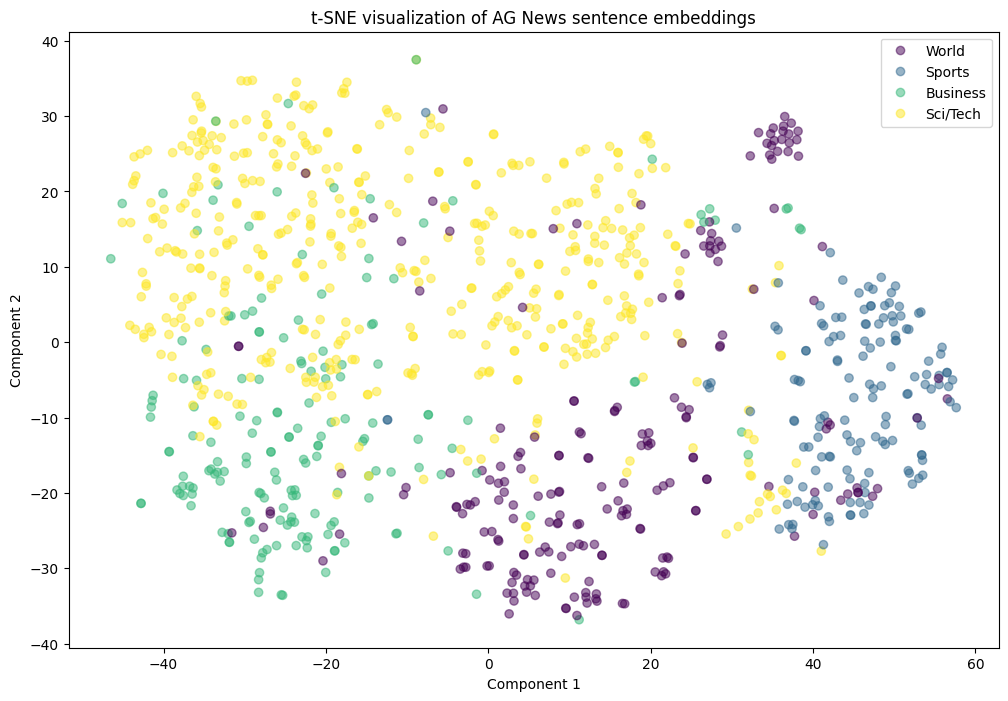

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Use t-SNE to reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

# Plot the 2D embeddings with labels
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=subset["label"], cmap="viridis", alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=['World', 'Sports', 'Business', 'Sci/Tech'])
plt.title("t-SNE visualization of AG News sentence embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

From the visualization results, we can see that the numerical representation we obtained is reasonably well-differentiated according to the topic information.

## Search Similar Sentences using  Similarity

Now, let's conduct a simple experiment to find 'similar sentences' using the numbers obtained above.

Once we convert to numerical representations, we can easily calculate sentence-to-sentence similarity using well-defined mathematical metrics or even implement a similarity search engine using them.

The very simple procedure is as follows:

1. Convert the target sentence into its numerical representation using the same NLP model.
2. Calculate the cosine similarity between the target sentence's representation and the representations of other sentences in the dataset.
3. Rank the sentences based on their similarity scores and select the top N similar sentences.

In [11]:
from scipy.spatial.distance import cdist
import numpy as np

In [12]:
query_text = subset["text"][10]
query_text

"Oil and Economy Cloud Stocks' Outlook  NEW YORK (Reuters) - Soaring crude prices plus worries  about the economy and the outlook for earnings are expected to  hang over the stock market next week during the depth of the  summer doldrums."

In [13]:
query_embeddings = model.encode([query_text])

In [14]:
query_embeddings.shape

(1, 384)



<img src="https://www.dropbox.com/scl/fi/7w8ixadufn2likcse8qtr/cosine_distance.png?rlkey=6sbz1e7h2126ccp6knio6qug5&dl=1" alt="archtecture" width="600" height="auto">

(description is from [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html))


In [15]:
# Calculate cosine distance ( reverse form of cosine similarity )
distances = cdist(query_embeddings, embeddings, "cosine")[0]

In [16]:
print( distances.shape )
print( distances[:50])

(1000,)
[7.72279813e-01 7.91435721e-01 4.27550591e-02 6.83373759e-01
 5.17125615e-01 4.50906896e-01 7.41507798e-01 7.12965662e-01
 8.92665723e-01 8.22515855e-01 1.20570220e-13 6.50453499e-01
 6.63589323e-01 6.06651251e-01 6.78192908e-01 9.81895262e-01
 9.10465288e-01 7.48440848e-01 6.65594729e-01 7.55740328e-01
 7.36231862e-01 8.45757001e-01 8.72987335e-01 9.40513588e-01
 8.93911172e-01 9.87615728e-01 6.76234150e-01 6.86522389e-01
 8.54912446e-01 1.08384265e+00 9.24992188e-01 8.04356734e-01
 6.55512665e-01 8.05245485e-01 8.72552344e-01 8.13588887e-01
 7.10555269e-01 8.41387764e-01 8.39718598e-01 9.18996310e-01
 9.94019064e-01 6.63065913e-01 9.21830555e-01 9.18287855e-01
 9.45288525e-01 8.99409610e-01 7.11200047e-01 8.90063858e-01
 8.17624786e-01 9.16199559e-01]


In [17]:
N = distances.shape[0]

In [18]:
c_data = { 'query_text' : [query_text] * N, 'target_text' : subset["text"], 'distance': distances }

In [19]:
import pandas as pd
c_df = pd.DataFrame(c_data)

format_distance = lambda x: f'{x:.2f}'
c_df['distance'] = c_df['distance'].apply(format_distance)
sorted_df = c_df.sort_values(by='distance')

print(sorted_df[:5].target_text.values)
print("-"*10)
sorted_df

["Oil and Economy Cloud Stocks' Outlook  NEW YORK (Reuters) - Soaring crude prices plus worries  about the economy and the outlook for earnings are expected to  hang over the stock market this week during the depth of the  summer doldrums."
 "Oil and Economy Cloud Stocks' Outlook  NEW YORK (Reuters) - Soaring crude prices plus worries  about the economy and the outlook for earnings are expected to  hang over the stock market next week during the depth of the  summer doldrums."
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums."
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market this week during the depth of the\\summer doldrums."
 "Stocks Open Near Flat as Oil Near Reco

,query_text,target_text,distance
546,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Oil and Economy Cloud Stocks' Outlook NEW YOR...,0.00
10,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Oil and Economy Cloud Stocks' Outlook NEW YOR...,0.00
2,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Oil and Economy Cloud Stocks' Outlook (Reuters...,0.04
543,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Oil and Economy Cloud Stocks' Outlook (Reuters...,0.04
868,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Stocks Open Near Flat as Oil Near Record NEW ...,0.42
...,...,...,...
833,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Olympian on Briton death charge An Olympic sai...,1.13
376,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Trojan Bites Symbian Phones Mobile phones are ...,1.14
682,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Schumacher Sets Mark Michael Schumacher won th...,1.14
469,Oil and Economy Cloud Stocks' Outlook NEW YOR...,Rehabbing his career Player introductions at t...,1.14


We can see that sentences with similar forms and meanings have been identified.